### Introduction

In the following notebook, I will be cleaning a raw data file of listings data from Inside Airbnb

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Read in data**

In [3]:
#Set path to data on local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\01_Raw\SF Airbnb'

#Read in data
df = pd.read_csv(path + '/2020_0715_Aggregated_Listings.csv',parse_dates= ['host_since','last_review', 'first_review'],index_col=0,
                dtype = {'review_scores_accuracy':'category','review_scores_checkin':'category',
                          'review_scores_cleanliness':'category','review_scores_communication':'category',
                          'review_scores_location':'category', 'review_scores_value':'category',
                         'zipcode':'object'}
                )

### Data Overview

**Preview Data**

In [4]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (126297, 106)


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,experiences_offered,extra_people,first_review,guests_included,has_availability,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,host_verifications,house_rules,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,medium_url,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,monthly_price,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,number_of_reviews_ltm,picture_url,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,*Full access to patio and backyard (shared wit...,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",0,77,0,1,1.0,Real Bed,1.0,2.0,1,1.0,0.0,0.0,2019-04-03,a week ago,moderate,San Francisco,$100.00,United States,US,New update: the house next door is under const...,none,$25.00,2009-07-23,2,t,We are a family with 2 boys born in 2009 and 2...,NaN,t,1169,t,t,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,https://a0.muscache.com/im/pictures/efdad96a-3...,100%,within an hour,2008-07-31,https://a0.muscache.com/im/pictures/efdad96a-3...,1.0,https://www.airbnb.com/users/show/1169,"['email', 'phone', 'facebook', 'reviews', 'kba']",* No Pets - even visiting guests for a short t...,958,t,A family of 4 lives upstairs with their dog. N...,f,t,"{""SAN FRANCISCO""}",2019-03-16,2019-04-03,37.76931,STR-0001256,https://www.airbnb.com/rooms/958,-122.43386,San Francisco,30.0,1.0,30,30.0,NaN,30.0,1.0,1,1.0,"$4,200.00","Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Duboce Triangle,Western Addition,NaN,Due to the fact that we have children and a do...,183,51.0,https://a0.muscache.com/im/pictures/b7c2a199-4...,$170.00,Apartment,f,f,t,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,20190403130253,$100.00,"San Francisco, CA","Newly remodeled, modern, and bright garden uni...",NaN,CA,"San Francisco, CA, United States",New update: the house next door is under const...,NaN,*Public Transportation is 1/2 block away. *Ce...,"$1,120.00",NaN,94117
3,NaN,2,"{TV,Internet,Wifi,Kitchen,""Free street parking...",30,365,60,90,4.0,Real Bed,1.0,1.0,9,0.0,9.0,0.0,2019-04-03,17 months ago,strict_14_with_grace_period,San Francisco,$50.00,United States,US,Nice and good public transportation. 7 minute...,none,$12.00,2014-09-08,1,t,7 minutes walk to UCSF. 15 minutes walk to US...,NaN,t,21994,t,f,10.0,"San Francisco, California, United States",Aaron,Cole Valley,https://a0.muscache.com/im/users/21994/profile...,100%,within a few hours,2009-06-17,https://a0.muscache.com/im/users/21994/profile...,10.0,https://www.airbnb.com/users/show/21994,"['email', 'phone', 'reviews', 'jumio', 'govern...",no pet no smoke no party inside the building,8142,f,NaN,f,t,"{""SAN FRANCISCO""}",2018-09-12,2019-04-03,37.7

**View data description**

In [5]:
#View data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,126297.0,3.217606e+00,1.947932e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
availability_30,126297.0,9.533061e+00,1.049674e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.700000e+01,3.000000e+01
availability_365,126297.0,1.430297e+02,1.260243e+02,0.000000e+00,2.500000e+01,1.060000e+02,2.630000e+02,3.650000e+02
availability_60,126297.0,2.289656e+01,2.104898e+01,0.000000e+00,1.000000e+00,1.800000e+01,4.100000e+01,6.000000e+01
availability_90,126297.0,3.826479e+01,3.169050e+01,0.000000e+00,5.000000e+00,3.500000e+01,6.600000e+01,9.000000e+01
bathrooms,126018.0,1.342725e+00,8.547612e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.500000e+00,1.400000e+01
bedrooms,126282.0,1.354674e+00,9.217768e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01
beds,126196.0,1.769351e+00,1.206988e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
calculated_host_listings_count,126297.0,1.164051e+01,3.751256e+01,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,3.010000e+02
calculated_host_listings_count_entire_homes,106033.0,9.401535e+00,3.846035e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.010000e+02


## Data Cleaning

### Drop Columns

**Drop mostly homogenous/redundant columns and columns with only missing values**

In [6]:
#Extract cols with values with more than 1 unique value
df = df.loc[:,(df.nunique() != 1)]

In [7]:
#Drop missing columns
df.dropna(axis =1,how = 'all', inplace = True)

#Drop redundant columns
df.drop(['jurisdiction_names', 'market','state','neighbourhood','street','smart_location','host_neighbourhood'], axis = 1, inplace = True)

In [8]:
#Inspect cols with <=2 unique values
inspect = df.loc[:, (df.nunique() <=2)].columns.to_list()

#Check
display(df[inspect].head(3))

,host_has_profile_pic,host_identity_verified,host_is_superhost,instant_bookable,is_location_exact,require_guest_phone_verification,require_guest_profile_picture,requires_license
0,t,t,t,t,t,f,f,t
3,t,t,f,f,t,f,f,t
4,t,t,f,f,t,t,t,t


In [9]:
#Create dictionary for mapping
mapping = {'t':1,'f':0}

#Map 1's and 0's on t's and f's
df[inspect] = df[inspect].apply(lambda x: x.map(mapping, na_action='ignore'))

#Check
display(df[inspect].head(3))

,host_has_profile_pic,host_identity_verified,host_is_superhost,instant_bookable,is_location_exact,require_guest_phone_verification,require_guest_profile_picture,requires_license
0,1.0,1.0,1.0,1,1,0,0,1
3,1.0,1.0,0.0,0,1,0,0,1
4,1.0,1.0,0.0,0,1,1,1,1


**Drop columns containing url data or pertain to webscraping**

In [10]:
#Subset column headers containing 'url' or 'scrape' and store in drop
drop = list(df.filter(regex='url|scrape').columns)

#Drop drop list and check
df.drop(columns= df[drop], inplace=True)
df.head(1)

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_response_rate,host_response_time,host_since,host_total_listings_count,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,monthly_price,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,square_feet,summary,transit,weekly_price,zipcode
0,*Full access to patio and backyard (shared wit...,3,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",0,77,0,1,1.0,Real Bed,1.0,2.0,1,1.0,0.0,0.0,a week ago,moderate,San Francisco,$100.00,New update: the house next door is under const...,$25.00,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,NaN,1.0,1169,1.0,1.0,1.0,"San Francisco, California, United States",Holly,100%,within an hour,2008-07-31,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",* No Pets - even visiting guests for a short t...,958,1,A family of 4 lives upstairs with their dog. N...,1,2019-03-16,37.76931,STR-0001256,-122.43386,30.0,1.0,30,30.0,30.0,1.0,1,1.0,"$4,200.00","Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,Due to the fact that we have children and a do...,183,51.0,$170.00,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,$100.00,"Newly remodeled, modern, and bright garden uni...",NaN,New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,"$1,120.00",94117


## Check for high correlations between features

**Prepare data**

In [11]:
#Create correlation matrix and capture absolute values of correlations
c = df.corr().abs()

#Create a df that stores correlations between features >.9
s = c.unstack()
so = s.sort_values(kind="quicksort").reset_index()
so.columns = ['feat1','feat2','corr']
so = so.loc[ (so.feat1 != so.feat2 )& (so['corr'] > .9)]

#Capture list of features
feats =so.feat1.unique()

#Subset df by cols in feats and create corr
corr= df[feats].corr()

**Create heatmap**

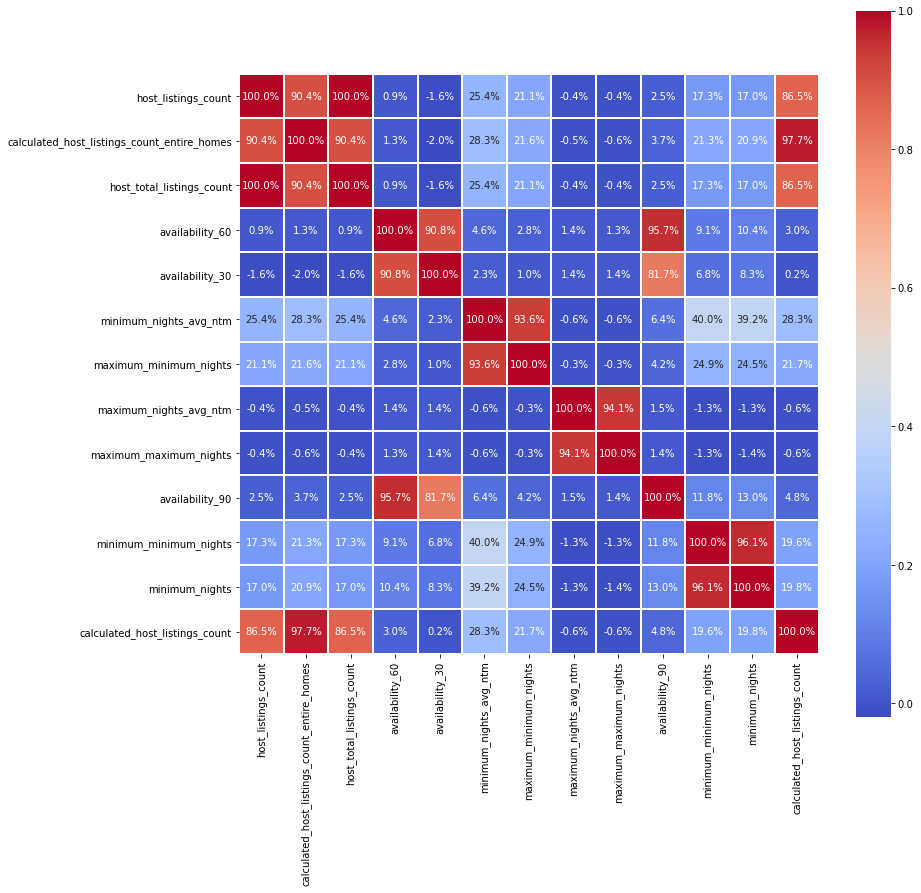

In [12]:
#Create fig
f, ax = plt.subplots(figsize = (13,13))

#Plot corr as heat map
sns.heatmap(data = corr, annot=True,fmt='.1%', cmap = 'coolwarm', ax=ax,
            linewidths=1.0, square=1);

**Drop cols with high collinearity**

In [13]:
#Cols with high collinearity
drop = ['calculated_host_listings_count_entire_homes','maximum_nights_avg_ntm', 'maximum_maximum_nights','minimum_maximum_nights',
        'maximum_minimum_nights','minimum_minimum_nights', 'minimum_nights_avg_ntm', 'host_total_listings_count']

#Drop drop
df.drop(drop, axis=1, inplace = True)

## Clean up object and numeric columns

**Clean up numeric columns**

In [14]:
#Filter cols pertaining to prices and assign col names as a list to money_cols
money_cols = df.filter(regex = 'people|deposit|price|fee$|rate').columns.tolist()

#Remove $, and set type as numeric for money_cols
df[money_cols] = df[money_cols].replace('[$|,|%]','',regex = True).astype('float')

#Check
display(df[money_cols].head(3))

,cleaning_fee,extra_people,host_acceptance_rate,host_response_rate,monthly_price,price,security_deposit,weekly_price
0,100.0,25.0,NaN,100.0,4200.0,170.0,100.0,1120.0
3,50.0,12.0,NaN,100.0,1685.0,65.0,200.0,490.0
4,225.0,150.0,NaN,100.0,NaN,785.0,0.0,NaN


**Filter price such that all values are > 0**

In [15]:
#How many rows have price == 0? 
print('Number of rows with price is 0: {}'.format(len(df.loc[df.price == 0])))

#Remove
df = df.loc[~(df.price == 0)]

Number of rows with price is 0: 20


**Clean up object columns**

In [16]:
#Create list of columns to apply cleaning to
objects = df.select_dtypes('object').columns.to_list()

#Check
display(df[objects].head(3))

,access,amenities,bed_type,calendar_updated,cancellation_policy,city,description,host_about,host_location,host_name,host_response_time,host_verifications,house_rules,interaction,license,name,neighborhood_overview,neighbourhood_cleansed,notes,property_type,room_type,space,summary,transit,zipcode
0,*Full access to patio and backyard (shared wit...,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",Real Bed,a week ago,moderate,San Francisco,New update: the house next door is under const...,We are a family with 2 boys born in 2009 and 2...,"San Francisco, California, United States",Holly,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",* No Pets - even visiting guests for a short t...,A family of 4 lives upstairs with their dog. N...,STR-0001256,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,Due to the fact that we have children and a do...,Apartment,Entire home/apt,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117
3,NaN,"{TV,Internet,Wifi,Kitchen,""Free street parking...",Real Bed,17 months ago,strict_14_with_grace_period,San Francisco,Nice and good public transportation. 7 minute...,7 minutes walk to UCSF. 15 minutes walk to US...,"San Francisco, California, United States",Aaron,within a few hours,"['email', 'phone', 'reviews', 'jumio', 'govern...",no pet no smoke no party inside the building,NaN,NaN,Friendly Room Apt. Style -UCSF/USF - San Franc...,NaN,Haight Ashbury,Please email your picture id with print name (...,Apartment,Private room,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle. small shopp...",94117
4,Guests have access to everything listed and sh...,"{TV,Internet,Wifi,Kitchen,Heating,""Family/kid ...",Real Bed,4 months ago,strict_14_with_grace_period,San Francisco,Pls email before booking. Interior featured i...,Always searching for a perfect piece at Europe...,"San Francisco, California, United States",Rosy,within an hour,"['email', 'phone', 'reviews', 'kba']",House Manual and House Rules will be provided ...,NaN,STR-0000264,Historic Alamo Square Victorian,NaN,Western Addition,tax ID on file tax ID on file,House,Entire home/apt,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,NaN,94117


In [17]:
#Remove quotes and brackets. Keeping other punctuation
df[objects] = df[objects].apply(lambda x : x.str.replace('[{"}_\'\[\]]',' '))

#Check
display(df[objects].head())

,access,amenities,bed_type,calendar_updated,cancellation_policy,city,description,host_about,host_location,host_name,host_response_time,host_verifications,house_rules,interaction,license,name,neighborhood_overview,neighbourhood_cleansed,notes,property_type,room_type,space,summary,transit,zipcode
0,*Full access to patio and backyard (shared wit...,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets liv...",Real Bed,a week ago,moderate,San Francisco,New update: the house next door is under const...,We are a family with 2 boys born in 2009 and 2...,"San Francisco, California, United States",Holly,within an hour,"email , phone , facebook , reviews , kba",* No Pets - even visiting guests for a short t...,A family of 4 lives upstairs with their dog. N...,STR-0001256,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,Due to the fact that we have children and a do...,Apartment,Entire home/apt,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117
3,NaN,"TV,Internet,Wifi,Kitchen, Free street parking...",Real Bed,17 months ago,strict 14 with grace period,San Francisco,Nice and good public transportation. 7 minute...,7 minutes walk to UCSF. 15 minutes walk to US...,"San Francisco, California, United States",Aaron,within a few hours,"email , phone , reviews , jumio , govern...",no pet no smoke no party inside the building,NaN,NaN,Friendly Room Apt. Style -UCSF/USF - San Franc...,NaN,Haight Ashbury,Please email your picture id with print name (...,Apartment,Private room,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle. small shopp...",94117
4,Guests have access to everything listed and sh...,"TV,Internet,Wifi,Kitchen,Heating, Family/kid ...",Real Bed,4 months ago,strict 14 with grace period,San Francisco,Pls email before booking. Interior featured i...,Always searching for a perfect piece at Europe...,"San Francisco, California, United States",Rosy,within an hour,"email , phone , reviews , kba",House Manual and House Rules will be provided ...,NaN,STR-0000264,Historic Alamo Square Victorian,NaN,Western Addition,tax ID on file tax ID on file,House,Entire home/apt,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,NaN,94117
5,NaN,"TV, Cable TV ,Internet,Wifi,Kitchen, Free par...",Real Bed,yesterday,moderate,San Francisco,"Fully furnished 2BR, 1BA flat in beautiful Vic...","We are a family of three who love live music,...","San Francisco, California, United States",Sandy,within a day,"email , phone , facebook , reviews","No smoking, as I m quite allergic. Please put ...","I am generally here to welcome you, and if not...",STR-0000278,Lovely 2BR flat Great Location,"The neighborhood is very centrally located, cl...",Western Addition,NaN,Apartment,Entire home/apt,"Fully furnished 2BR, 1BA flat in beautiful Vic...",NaN,We re 2 blocks from several bus lines that can...,94115
6,You ll have your own bedroom and private bathr...,"TV, Cable TV ,Internet,Wifi, Paid parking off...",Real Bed,today,strict 14 with grace period,San Francisco,"Welcome to The Mission, the sunniest neighbo...",Ivan is a publisher of a book for 4 year olds....,"San Francisco, California, United States",Ivan & Wendy,within an hour,"email , phone , reviews , kba , work ema...","PLEASE: Read through our entire listing, as we...","We are experienced Airbnb hosts, and have had ...",STR-0000028,"Mission Sunshine, with Private Bath",Located between Valencia Street and Dolores Pa...,Mission,"We live in a dense, urban neighborhood, and ou...",Condominium,Private room,"Your sunny room looks out over a lush garden, ...","Welcome to The Mission, the sunniest neighbo...",It s an easy and enjoyable 10 minute stroll to...,94110


### Missing Data - Resolve by Data Type

#### Datetime64

In [18]:
#Import missing_calculator
from Missing_Stats import missing_calculator

#View missing statistics - datetime64
display(missing_calculator(df, data_type='datetime64'))

,count,percentage
host_since,72,0.057018


Dropping first_review and host_since, does not pertain specifically to price of listings. Additionally dropping all rows without last_review date. These listings were not booked at time of scraping, meaning that price data pertainig to these listings will skeew findings

In [19]:
#Drop first_review and host_since
df.drop(['first_review','host_since'], axis = 1, inplace=True)

In [20]:
#Chech
display(missing_calculator(df, data_type='datetime64'))

,count,percentage


#### Float64 

In [21]:
#View missing statistics - float64
display(missing_calculator(df, data_type='float64'))

,count,percentage
square_feet,123787,98.028144
monthly_price,107210,84.900655
weekly_price,105338,83.418200
host_acceptance_rate,97885,77.516096
security_deposit,21094,16.704546
calculated_host_listings_count_private_rooms,20264,16.047261
calculated_host_listings_count_shared_rooms,20264,16.047261
number_of_reviews_ltm,20264,16.047261
host_response_rate,15854,12.554939
cleaning_fee,9660,7.649849


**Drop columns w/ mostly missing values**

Leaving weekly and monthly price since not all hosts have to offer the service and they are sometimes at a special rate compared to the per night rental.

Keeping reviews_per_month as is for now, may fill with mean if needed.

In [22]:
#Dropping square_feet and host_acceptance_rate
df.drop(['square_feet','host_acceptance_rate'], axis = 1, inplace = True)

**Fill remaining cols**

In [23]:
#Subset cols to apply nafill w/ median
cols = ['security_deposit', 'host_response_rate', 'cleaning_fee']

#Fill na w/ median
df[cols]=df[cols].fillna(df.median().iloc[0])

#Subset cols to apply nafill w/ mode
cols = ['beds', 'bathrooms', 'bedrooms']

#Fill na w/mode
df[cols] = df[cols].fillna(df.mode().iloc[0])

#Capture cols for filling
cols = ['host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_listings_count' ]

#Ffill, bfill remaining missing floats
df.loc[:,cols]=df.loc[:,cols].ffill().bfill()

#Check
display(missing_calculator(df, data_type='float64'))

,count,percentage
monthly_price,107210,84.900655
weekly_price,105338,83.418200
calculated_host_listings_count_private_rooms,20264,16.047261
calculated_host_listings_count_shared_rooms,20264,16.047261
number_of_reviews_ltm,20264,16.047261
review_scores_rating,715,0.566216


#### Objects

In [24]:
#View missing statistics - object
display(missing_calculator(df, data_type='object'))

,count,percentage
notes,42167,33.392463
interaction,33099,26.211424
access,31841,25.215202
host_about,28720,22.743651
house_rules,28448,22.528251
transit,26992,21.375231
license,26896,21.299207
neighborhood_overview,26579,21.048172
host_response_time,15853,12.554147
space,15261,12.085336


In [25]:
#Cols containing text data not needed for machine learning
cols =['notes','access', 'interaction', 'transit', 'house_rules', 'neighborhood_overview', 
       'description','name','summary','host_about', 'license','calendar_updated','number_of_reviews_ltm','host_listings_count',
       'space', 'host_location', 'license']

#Drop cols
df.drop(cols, axis = 1, inplace = True)

**Miscellaneous Column cleaning**

In [26]:
#Cols for ffill and bfill
cols = ['host_response_time','cancellation_policy']

#Ffill, bfill objects
df.loc[:,cols]=df.loc[:,cols].ffill().bfill()

df.groupby('is_location_exact')['is_location_exact'].count()

is_location_exact
0     14347
1    111930
Name: is_location_exact, dtype: int64

**City clean-up**

In [27]:
#View unique values in city
print('Unique values in city:\n', df.city.unique())

#Fix Daly City, San Francisco
df.city.replace('[^A-Za-z0-9\s]','San Francisco',regex = True, inplace=True)
df.city.replace('Da.*','Daly City',regex = True, inplace=True)
df.city.replace('(San\sF|Noe|B|Nor).*','San Francisco',regex = True, inplace=True)

#Fill na with San Francisco
df.city.fillna('San Francisco', inplace=True)

#Check
print('Unique values in city:\n', df.city.unique())

Unique values in city:
 ['San Francisco' 'San Francisco, Hayes Valley'
 'Noe Valley - San Francisco' 'San Francisco ' 'Daly City' nan
 'South San Francisco' 'Vallejo ' 'San Franscisco' 'Bay Area' 'Daly City '
 'San Fàncisco' 'Nor cal' 'Brisbane' 'Bernal Heights, San Francisco' '旧金山'
 '舊金山']
Unique values in city:
 ['San Francisco' 'Daly City' 'South San Francisco' 'Vallejo ']


**Zipcode clean-up**

In [28]:
#Remove white spaces and CA
df.zipcode.replace('[CA]*\s*','', regex = True, inplace=True)

#Read in libraries to resolve missing values for zipcode using lat/long
from uszipcode import SearchEngine
from uszipcode import Zipcode

#Instantiate SearchEngine
zipsearch = SearchEngine(simple_zipcode=True)

#Write function that finds zip given lat and long data
def get_zipcode(lat, lon):
    result = zipsearch.by_coordinates(lat = lat, lng = lon, returns = 1)
    return result[0].zipcode

#Apply get_zipcode and assign to Zipcode
df.zipcode[df.zipcode.isna()]= df[df.zipcode.isna()][['latitude', 'longitude']].swifter.apply(lambda x: get_zipcode(x.latitude, x.longitude), axis =1)

#Remove rows with missing zip
df = df[~(df.zipcode == '')]

#### Category

In [29]:
df.filter(regex='review_score')

,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
0,10.0,10.0,10.0,10.0,10.0,97.0,10.0
3,9.0,10.0,9.0,10.0,9.0,93.0,9.0
4,10.0,10.0,10.0,10.0,10.0,97.0,9.0
5,9.0,10.0,8.0,10.0,9.0,90.0,9.0
6,10.0,10.0,10.0,10.0,10.0,98.0,10.0
...,...,...,...,...,...,...,...
7832,10.0,10.0,10.0,10.0,10.0,100.0,10.0
7836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7855,10.0,10.0,10.0,10.0,10.0,100.0,9.0
7882,8.0,10.0,10.0,10.0,10.0,100.0,10.0


In [30]:
#View missing statistics - category
display(missing_calculator(df, data_type='category'))

,count,percentage
review_scores_checkin,770,0.609862
review_scores_location,770,0.609862
review_scores_value,770,0.609862
review_scores_accuracy,769,0.609070
review_scores_cleanliness,769,0.609070
review_scores_communication,769,0.609070


In [32]:
#Drop review_scores cols other than review_scores_rating. Fill with mean
fill_cols = df.filter(regex='review_scores').columns
fill_cols = fill_cols.drop('review_scores_rating')

#Drop fill_cols
df.drop(fill_cols, axis = 1, inplace=True)

#Fill review_scores_rating mean
df.review_scores_rating = df.review_scores_rating.fillna(np.mean(df.review_scores_rating))

#Check
display(missing_calculator(df, data_type='category'))

,count,percentage
monthly_price,107191,84.898383
weekly_price,105319,83.415704
calculated_host_listings_count_private_rooms,20264,16.049676
calculated_host_listings_count_shared_rooms,20264,16.049676
host_name,72,0.057026


**Final Check Missing Values**

In [33]:
display(missing_calculator(df))

,count,percentage
monthly_price,107191,84.898383
weekly_price,105319,83.415704
calculated_host_listings_count_private_rooms,20264,16.049676
calculated_host_listings_count_shared_rooms,20264,16.049676
host_name,72,0.057026


Check Data

In [34]:
#Print final shape of df
print('Shape of cleaned data:', df.shape)
display(df.head())

Shape of cleaned data: (126258, 48)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,last_review,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
0,3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets liv...",0,77,0,1,1.0,Real Bed,1.0,2.0,1,0.0,0.0,moderate,San Francisco,100.0,25.0,2,1.0,1169,1.0,1.0,Holly,100.0,within an hour,"email , phone , facebook , reviews , kba",958,1,1,2019-03-16,37.76931,-122.43386,30,1,4200.0,Western Addition,183,170.0,Apartment,0,0,1,97.0,1.55,Entire home/apt,100.0,1120.0,94117
3,2,"TV,Internet,Wifi,Kitchen, Free street parking...",30,365,60,90,4.0,Real Bed,1.0,1.0,9,9.0,0.0,strict 14 with grace period,San Francisco,50.0,12.0,1,1.0,21994,1.0,0.0,Aaron,100.0,within a few hours,"email , phone , reviews , jumio , govern...",8142,0,1,2018-09-12,37.76487,-122.45183,90,32,1685.0,Haight Ashbury,8,65.0,Apartment,0,0,1,93.0,0.14,Private room,200.0,490.0,94117
4,5,"TV,Internet,Wifi,Kitchen,Heating, Family/kid ...",30,90,60,90,1.5,Real Bed,2.0,2.0,2,0.0,0.0,strict 14 with grace period,San Francisco,225.0,150.0,2,1.0,24215,1.0,0.0,Rosy,100.0,within an hour,"email , phone , reviews , kba",8339,0,1,2018-08-11,37.77525,-122.43637,1125,7,NaN,Western Addition,27,785.0,House,1,1,1,97.0,0.23,Entire home/apt,0.0,NaN,94117
5,6,"TV, Cable TV ,Internet,Wifi,Kitchen, Free par...",0,20,5,9,1.0,Real Bed,2.0,3.0,1,0.0,0.0,moderate,San Francisco,125.0,0.0,1,1.0,25601,0.0,0.0,Sandy,90.0,within a day,"email , phone , facebook , reviews",8567,0,1,2019-03-30,37.78471,-122.44555,365,2,NaN,Western Addition,32,255.0,Apartment,0,0,1,90.0,0.27,Entire home/apt,0.0,NaN,94115
6,3,"TV, Cable TV ,Internet,Wifi, Paid parking off...",4,131,19,42,1.0,Real Bed,1.0,2.0,2,2.0,0.0,strict 14 with grace period,San Francisco,50.0,60.0,2,1.0,7149,0.0,1.0,Ivan & Wendy,100.0,within an hour,"email , phone , reviews , kba , work ema...",8739,1,1,2019-03-23,37.75919,-122.42237,14,1,9999.0,Mission,656,139.0,Condominium,0,0,1,98.0,5.57,Private room,0.0,NaN,94110


### Write to csv

In [35]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Write file
df.to_csv(path + '/2020_0715_Listings_Cleaned.csv',index=False)